In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm

import sys
import networkx as nx
sys.path.append("../apparent/")

In [4]:
from utils import load_graphs

In [5]:
graphs_dir = "/Users/jeremy.wayland/Desktop/projects/apparent/outputs/or_graphs/"

In [6]:
graphs = load_graphs(graphs_dir,feature="OR_0",year=2017)

Error loading graph_39095742.pkl: Ran out of input
Error loading graph_35533689.pkl: Ran out of input


In [5]:
graphs[29323582].keys()

dict_keys(['graph', 'nnodes', 'nedges', 'density', 'degree_assortativity', 'year', 'hsanum', 'Year', 'HSA Name', 'Medicare Enrollees', 'Total Mortality: ASR-adjusted Percent of Deaths among Medicare Enrollees', 'Non-HMO Mortality: ASR-adjusted Percent of Deaths among Medicare Enrollees without HMO Coverage', 'OR_0'])

In [7]:
with open("/Users/jeremy.wayland/Desktop/projects/apparent/outputs/all_features.pkl","rb") as f:
    all_features = pickle.load(f)

In [8]:
all_features.head()

,hsanum,region,state,medicare_enrollment,total_mortality,non_hmo_mortality,forman_curvature,n_nodes,n_edges,density,...,ptl_stdprice_total,race_total_pop,race_black_pop,hispanic_total_pop,hispanic_pop,median_hh_income,employment_pop,employment_unemployed_pop,education_pop,education_nohs_pop
0,4002,Region 6 - Dallas,AR,1793,5.60,5.64,"[-2.0, 0.0, -2.0, -3.0, 0.0, 3.0, 1.0]",7,7,0.333333,...,91.1,9539,1860,9539,329,114143.0,3994,444,6816,1012
1,17037,Region 7 - Kansas City,KS,4878,4.63,4.62,"[10.0, 6.0, 8.0, 4.0, 0.0, 12.0, 7.0, 12.0, 9....",47,314,0.290472,...,71.8,28401,620,28401,4234,443329.0,14181,480,19655,2339
2,6035,Region 8 - Denver,CO,4552,4.79,4.78,"[-6.0, -1.0, -12.0, 15.0, 16.0, -9.0, -1.0, -4...",31,138,0.296774,...,10.6,25662,567,25662,10273,370168.0,10060,1011,17820,2661
3,1037,Region 4 - Atlanta,AL,15290,4.30,4.24,"[-21.0, 4.0, -18.0, -10.0, -11.0, -11.0, -19.0...",76,588,0.206316,...,40.0,63712,3830,63712,3587,299939.0,30731,2303,48068,4347
4,5131,Region 9 - San Francisco,CA,10506,3.76,3.79,"[-21.0, -45.0, -48.0, -43.0, -15.0, -25.0, 8.0...",55,340,0.228956,...,12.8,103630,3142,103630,72718,167798.0,44436,3617,59740,20740


In [11]:
orc = []
hsanum = []
networks = []

# Load ORC Features
for G in tqdm(graphs.values(), total=len(graphs), desc="Graphs"):

    hsanum.append(G["hsanum"])
    networks.append(G["graph"])
    orc.append(G["OR_0"])


Graphs: 100%|██████████| 2701/2701 [00:00<00:00, 130982.59it/s]


In [12]:
orc_df = pd.DataFrame({"hsanum":hsanum,"OR_0":orc,"Network": networks})

In [13]:
orc_df = orc_df.merge(all_features, on="hsanum")

In [14]:
orc_df

,hsanum,OR_0,Network,region,state,medicare_enrollment,total_mortality,non_hmo_mortality,forman_curvature,n_nodes,...,ptl_stdprice_total,race_total_pop,race_black_pop,hispanic_total_pop,hispanic_pop,median_hh_income,employment_pop,employment_unemployed_pop,education_pop,education_nohs_pop
0,4002,"[0.0, 0.10000000000000009, 0.0, -0.60000000000...","(1134458243, 1366432247, 1821479767, 113441541...",Region 6 - Dallas,AR,1793,5.60,5.64,"[-2.0, 0.0, -2.0, -3.0, 0.0, 3.0, 1.0]",7,...,91.1,9539,1860,9539,329,114143.0,3994,444,6816,1012
1,17037,"[0.6875, 0.5000000000000002, 0.616666666666666...","(1033173786, 1114928645, 1376593947, 137659595...",Region 7 - Kansas City,KS,4878,4.63,4.62,"[10.0, 6.0, 8.0, 4.0, 0.0, 12.0, 7.0, 12.0, 9....",47,...,71.8,28401,620,28401,4234,443329.0,14181,480,19655,2339
2,6035,"[0.22499999999999987, 0.26666666666666683, 0.0...","(1043236961, 1598765083, 1003865049, 134653836...",Region 8 - Denver,CO,4552,4.79,4.78,"[-6.0, -1.0, -12.0, 15.0, 16.0, -9.0, -1.0, -4...",31,...,10.6,25662,567,25662,10273,370168.0,10060,1011,17820,2661
3,1037,"[0.12499999999999989, 0.5625, 0.12777777777777...","(1144200510, 1366552895, 1376523753, 111412985...",Region 4 - Atlanta,AL,15290,4.30,4.24,"[-21.0, 4.0, -18.0, -10.0, -11.0, -11.0, -19.0...",76,...,40.0,63712,3830,63712,3587,299939.0,30731,2303,48068,4347
4,5131,"[0.19142857142857117, 0.019999999999999463, -0...","(1043220502, 1275585408, 1669422812, 170080270...",Region 9 - San Francisco,CA,10506,3.76,3.79,"[-21.0, -45.0, -48.0, -43.0, -15.0, -25.0, 8.0...",55,...,12.8,103630,3142,103630,72718,167798.0,44436,3617,59740,20740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,51021,"[0.14285714285714302, 0.20000000000000007, 0.3...","(1215963806, 1952563066, 1104113190, 144731376...",Region 3 - Philadelphia,WV,1142,4.79,5.73,"[-2.0, 0.0, 2.0, -5.0, 2.0, 4.0, -4.0, 2.0, 4....",11,...,83.6,5126,33,5126,67,269599.0,2399,153,3905,571
2697,17005,"[0.43999999999999995, 0.8633333333333333, 0.80...","(1003037615, 1114921889, 1073931804, 135634791...",Region 7 - Kansas City,KS,2854,4.22,4.44,"[0.0, 21.0, 18.0, 24.0, -4.0, 16.0, 20.0, -1.0...",29,...,52.4,17114,494,17114,493,325277.0,8399,570,10490,784
2698,15060,"[0.11111111111111094, 0.10526315789473695, 0.0...","(1427026418, 1497837363, 1740376805, 186140848...",Region 5 - Chicago,IN,6230,5.99,6.33,"[-25.0, -27.0, -36.0, -14.0, -20.0, -25.0, 13....",55,...,47.9,34844,983,34844,580,331210.0,14460,1105,24904,3097
2699,32001,"[0.8015151515151518, 0.8454545454545457, 0.090...","(1003800988, 1366445496, 1013284777, 104328239...",Region 6 - Dallas,NM,9448,4.32,4.32,"[45.0, 47.0, -42.0, -19.0, 51.0, 8.0, 14.0, -1...",71,...,24.6,51473,2007,51473,15358,414061.0,24175,1559,34769,3288


In [15]:
orc_df['average_orc'] = orc_df['OR_0'].apply(lambda x: np.mean(x))


<Axes: >

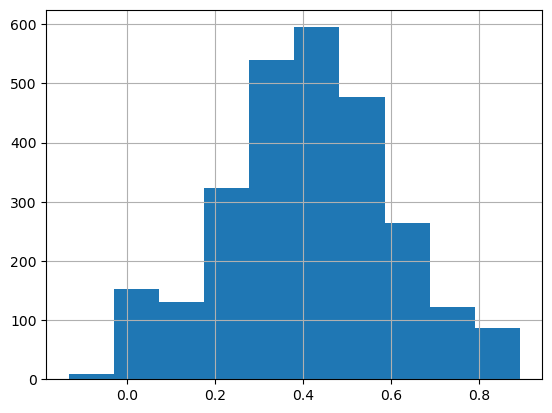

In [16]:
orc_df['average_orc'].hist()

In [32]:
max_index = orc_df['average_orc'].idxmax()
min_index = orc_df['average_orc'].idxmin()
zero_curvature = orc_df[orc_df['average_orc'] == 0].index[3]

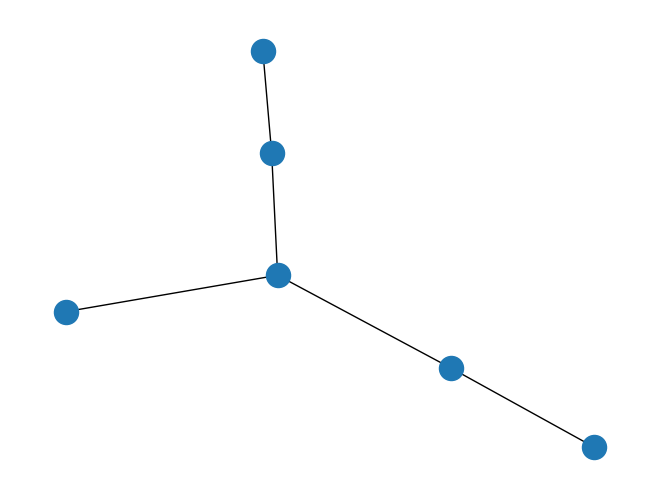

In [20]:
nx.draw(orc_df["Network"][min_index])

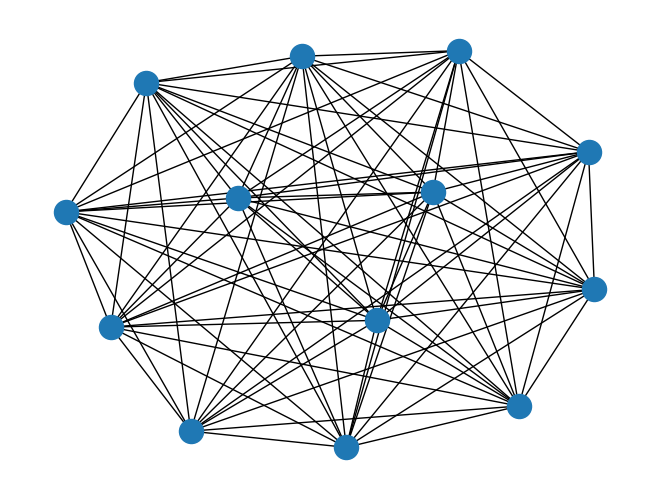

In [21]:
nx.draw(orc_df["Network"][max_index])

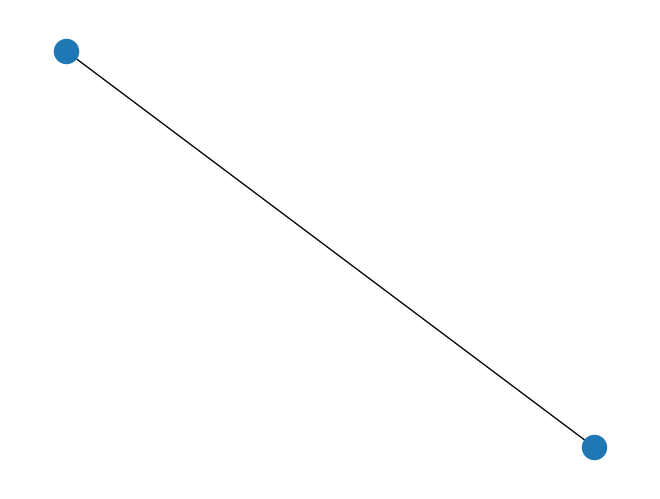

In [33]:
nx.draw(orc_df["Network"][zero_curvature])

## Saving Key Info

In [34]:
tags = ["min_curvature","max_curvature","zero_curvature"]

for i,idx in enumerate([min_index, max_index, zero_curvature]):
    tag = tags[i]
    results = {tag: dict(orc_df.iloc[idx])}
    filename = f"/Users/jeremy.wayland/Desktop/projects/apparent/outputs/{tag}_network.pkl"

{'hsanum': 45209, 'OR_0': array([ 0.        , -0.33333333,  0.        , -0.33333333,  0.        ]), 'Network': <networkx.classes.graph.Graph object at 0x1956a1be0>, 'region': 'Region 6 - Dallas', 'state': 'TX', 'medicare_enrollment': 2569, 'total_mortality': 4.94, 'non_hmo_mortality': 5.1, 'forman_curvature': array([ 1., -1.,  1., -1.,  0.]), 'n_nodes': 6, 'n_edges': 5, 'density': 0.3333333333333333, 'assortativity': -0.3333333333333341, 'average_degrees': 1.6666666666666667, 'clustering_coefficients': 0.0, 'node_connectivities': 1, 'degree_correlations': -0.3333333333333334, 'obd_overall_diab_bloodlip': nan, 'obd_nonblk_diab_bloodlip': nan, 'obd_blk_diab_bloodlip': nan, 'obd_blk_diab_eye': 28.0, 'obd_overall_diab_eye': 142.0, 'obd_nonblk_diab_eye': 114.0, 'obd_overall_diab_hgb': 202.0, 'obd_blk_diab_hgb': 39.0, 'obd_nonblk_diab_hgb': 163.0, 'obd_overall_mam_mam6769': 88.0, 'obd_nonblk_mam_mam6769': nan, 'obd_blk_mam_mam6769': nan, 'obd_nonblk_ptbjune_amcare2': 1243.0, 'obd_blk_ptbjune

# Graph Descriptors

In [ ]:
df = pd.read_csv("/Users/jeremy.wayland/Desktop/projects/apparent/outputs/networks_data.csv",index_col=0)

In [ ]:
df_2017 = df[df["year"]==2017]

In [ ]:
df_2017

,hsanum,year,nnodes,nedges,density,degree_assortativity
28953303,1001,2017,110,1456,0.242869,-0.389357
28954759,1002,2017,41,537,0.654878,-0.274159
28955296,1003,2017,31,184,0.395699,-0.316501
28955480,1004,2017,116,2284,0.342429,-0.416998
28957764,1006,2017,10,16,0.355556,-0.321429
...,...,...,...,...,...,...
39139836,53021,2017,50,743,0.606531,-0.232525
39140579,53023,2017,9,34,0.944444,-0.283019
39140613,53024,2017,7,21,1.000000,NaN
39140634,53025,2017,10,45,1.000000,NaN


In [ ]:
columns = list(df_2017.columns)
columns.remove("hsanum")

/var/folders/81/4smyjgm56s7gm79ptgb726s904l6lt/T/ipykernel_39104/1476051476.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="year", y=col, ax=axes[i],palette="Set3")
/var/folders/81/4smyjgm56s7gm79ptgb726s904l6lt/T/ipykernel_39104/1476051476.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="year", y=col, ax=axes[i],palette="Set3")
/var/folders/81/4smyjgm56s7gm79ptgb726s904l6lt/T/ipykernel_39104/1476051476.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="year", y=col, ax=axes[i],palette=

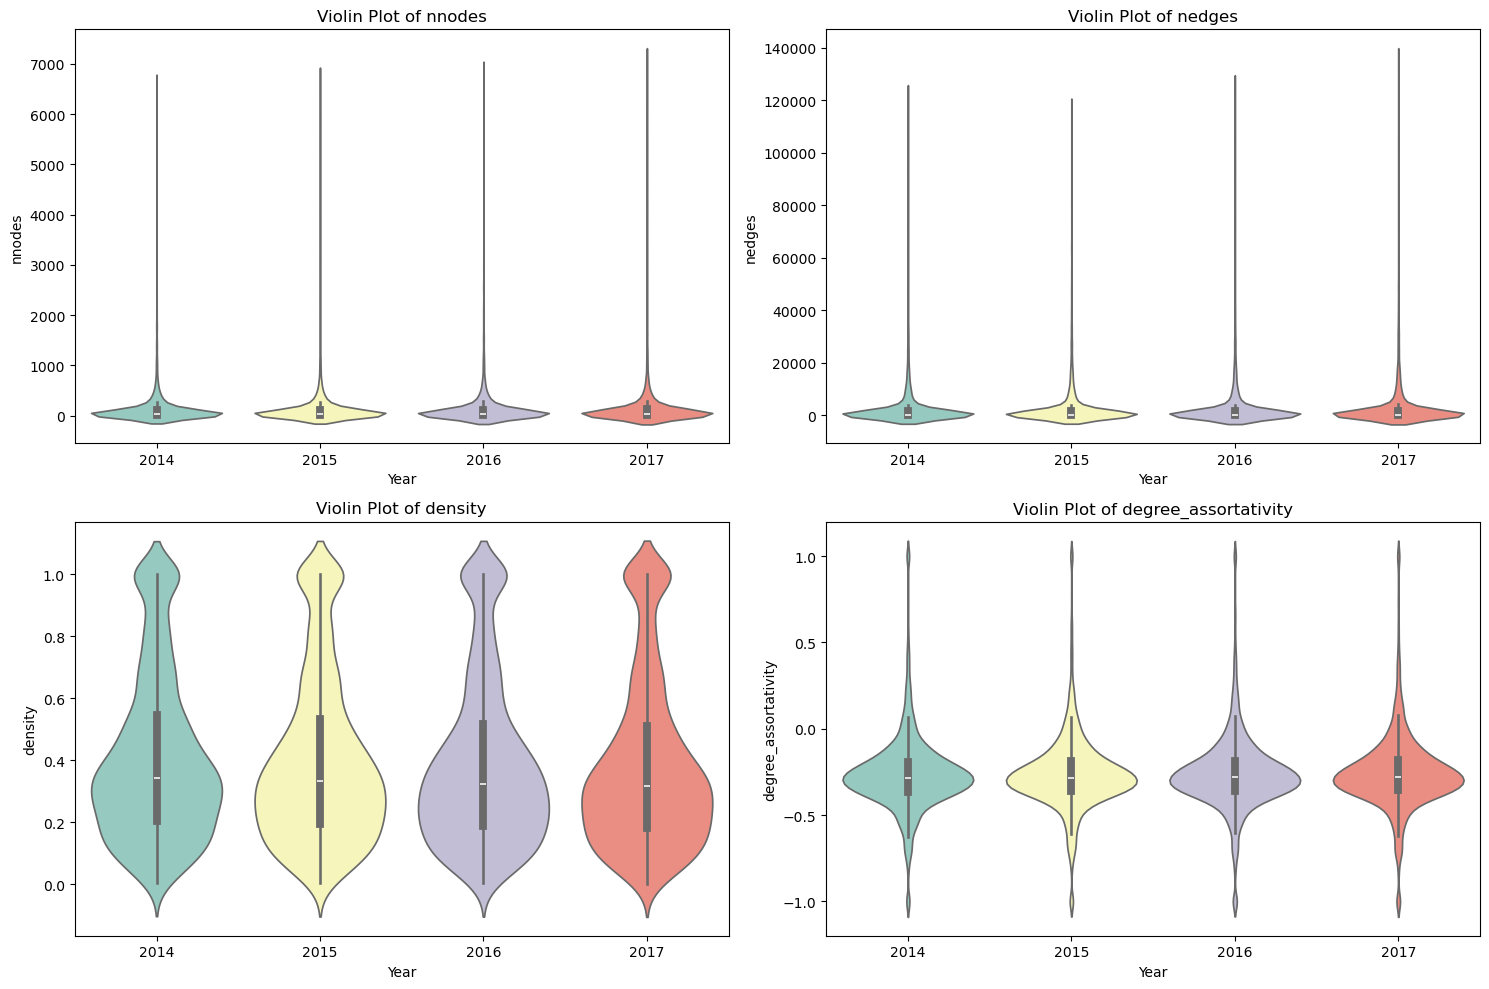

In [ ]:
columns = ['nnodes', 'nedges', 'density', 'degree_assortativity']

# Create subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Loop through each column and create violin plot
for i, col in enumerate(columns):
    sns.violinplot(data=df, x="year", y=col, ax=axes[i],palette="Set3")
    axes[i].set_title(f'Violin Plot of {col}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(col)


plt.tight_layout()  # Adjust subplot layout
plt.show()

In [ ]:
def compute_graph_statistics(G):
    num_components = nx.number_connected_components(G)
    average_degree = sum(dict(G.degree()).values()) / len(G)
    clustering_coefficient = nx.average_clustering(G)
    node_connectivity = nx.node_connectivity(G)
    degree_correlation = nx.degree_pearson_correlation_coefficient(G)
    return num_components, average_degree, clustering_coefficient, node_connectivity, degree_correlation

In [ ]:
from tqdm import tqdm
# Meta Data
hsa_names = []
hsanum = []
or_distribution = []
medicare_enrollment = []
total_mortality = []
non_hmo_mortality = []


# Network Properties
forman_distribution = []
n_nodes = []
n_edges = []
density = []
assortativity = []
# diameters = []
average_degrees = []
clustering_coefficients = []
node_connectivities = []
degree_correlations = []





for G in tqdm(graphs.values(), total=len(graphs), desc="Graphs"):
    # n_components, avg_deg, cc, nc, dc = compute_graph_statistics(G["graph"])
    # average_degrees.append(avg_deg)
    # clustering_coefficients.append(cc)
    # node_connectivities.append(nc)
    # degree_correlations.append(dc)


    hsanum.append(G["hsanum"])
    hsa_names.append(G["HSA Name"])
    # or_distribution.append(G["OR_0"])
    medicare_enrollment.append(G["Medicare Enrollees"])
    total_mortality.append(G["Total Mortality: ASR-adjusted Percent of Deaths among Medicare Enrollees"])
    non_hmo_mortality.append(G["Non-HMO Mortality: ASR-adjusted Percent of Deaths among Medicare Enrollees without HMO Coverage"])
    forman_distribution.append(G["Forman"])
    n_nodes.append(G["nnodes"])
    n_edges.append(G["nedges"])
    density.append(G["density"])
    assortativity.append(G["degree_assortativity"])




Graphs: 100%|██████████| 3371/3371 [00:00<00:00, 23816.10it/s]


In [ ]:
cross_walk = pd.read_csv("/Users/jeremy.wayland/Desktop/projects/apparent/data/state_to_region_crosswalk.csv")
cross_walk.head()

,region,state,code
0,Region 1 - Boston,Connecticut,CT
1,Region 1 - Boston,Maine,ME
2,Region 1 - Boston,Massachusetts,MA
3,Region 1 - Boston,New Hampshire,NH
4,Region 1 - Boston,Rhode Island,RI


In [ ]:
state_region_map = dict(zip(cross_walk['code'], cross_walk['region']))
states = [hsa.split('-')[0].strip() for hsa in hsa_names]
regions = [state_region_map[state] for state in states]

len(states)

3371

In [ ]:
# Sort Regions and Codes
region_order = cross_walk["region"].unique()
region_numbers = [int(region.split(' - ')[0].split(' ')[-1]) for region in region_order]
sorted_regions_array = [region for _, region in sorted(zip(region_numbers, region_order))]


In [ ]:
def create_dataframe(hsa_names,hsanum,regions,states, medicare_enrollment, total_mortality, non_hmo_mortality, forman_distribution, n_nodes, n_edges, density, assortativity, average_degrees, clustering_coefficients, node_connectivities, degree_correlations,):
    df = pd.DataFrame({
        "hsa_name": hsa_names,
        "hsanum": hsanum,
        "region" : regions,
        "state" : states,
        "medicare_enrollment": medicare_enrollment,
        "total_mortality": total_mortality,
        "non_hmo_mortality": non_hmo_mortality,
        "forman_curvature": forman_distribution,
        "n_nodes": n_nodes,
        "n_edges": n_edges,
        "density": density,
        "assortativity": assortativity,
        "average_degrees": average_degrees,
        "clustering_coefficients": clustering_coefficients,
        "node_connectivities": node_connectivities,
        "degree_correlations": degree_correlations
    })
    return df

In [ ]:
df = create_dataframe(
    hsa_names,hsanum,regions,states, medicare_enrollment,
    total_mortality, non_hmo_mortality, forman_distribution,
    n_nodes, n_edges, density, assortativity,
    average_degrees, clustering_coefficients,
    node_connectivities, degree_correlations
)

In [ ]:
# Create DataFrame
# df = pd.DataFrame({"hsanum": hsanum,'State': states, 'Region': regions,"Medicare": medicare_enrollment, "Total Mortality": total_mortality, "Non-HMO Mortality": non_hmo_mortality, "Forman Curvature": forman_distribution,"Num Nodes": n_nodes, "Num Edges": n_edges})


df.columns

Index(['hsanum', 'region', 'state', 'medicare_enrollment', 'total_mortality',
       'non_hmo_mortality', 'forman_curvature', 'n_nodes', 'n_edges',
       'density', 'assortativity', 'average_degrees',
       'clustering_coefficients', 'node_connectivities',
       'degree_correlations'],
      dtype='object')

In [ ]:
region_states = {
    "Region 1 - Boston": ["CT", "ME", "MA", "NH", "RI", "VT"],
    "Region 10 - Seattle": ["AK", "ID", "OR", "WA"],
    "Region 2 - New York": ["NJ", "NY", "PR", "VI"],
    "Region 3 - Philadelphia": ["DE", "DC", "MD", "PA", "VA", "WV"],
    "Region 4 - Atlanta": ["AL", "FL", "GA", "KY", "MS", "NC", "SC", "TN"],
    "Region 5 - Chicago": ["IL", "IN", "MI", "MN", "OH", "WI"],
    "Region 6 - Dallas": ["AR", "LA", "NM", "OK", "TX"],
    "Region 7 - Kansas City": ["IA", "KS", "MO", "NE"],
    "Region 8 - Denver": ["CO", "MT", "ND", "SD", "UT", "WY"],
    "Region 9 - San Francisco": ["AS", "AZ", "CA", "MP", "FM", "GU", "HI", "MH", "NV", "PW"]
}


# Sort states within each region
for region, states in region_states.items():
    region_states[region] = sorted(states)

# Concatenate sorted states into a single list
ordered_states = []
for region in sorted(region_states.keys()):
    ordered_states.extend(region_states[region])

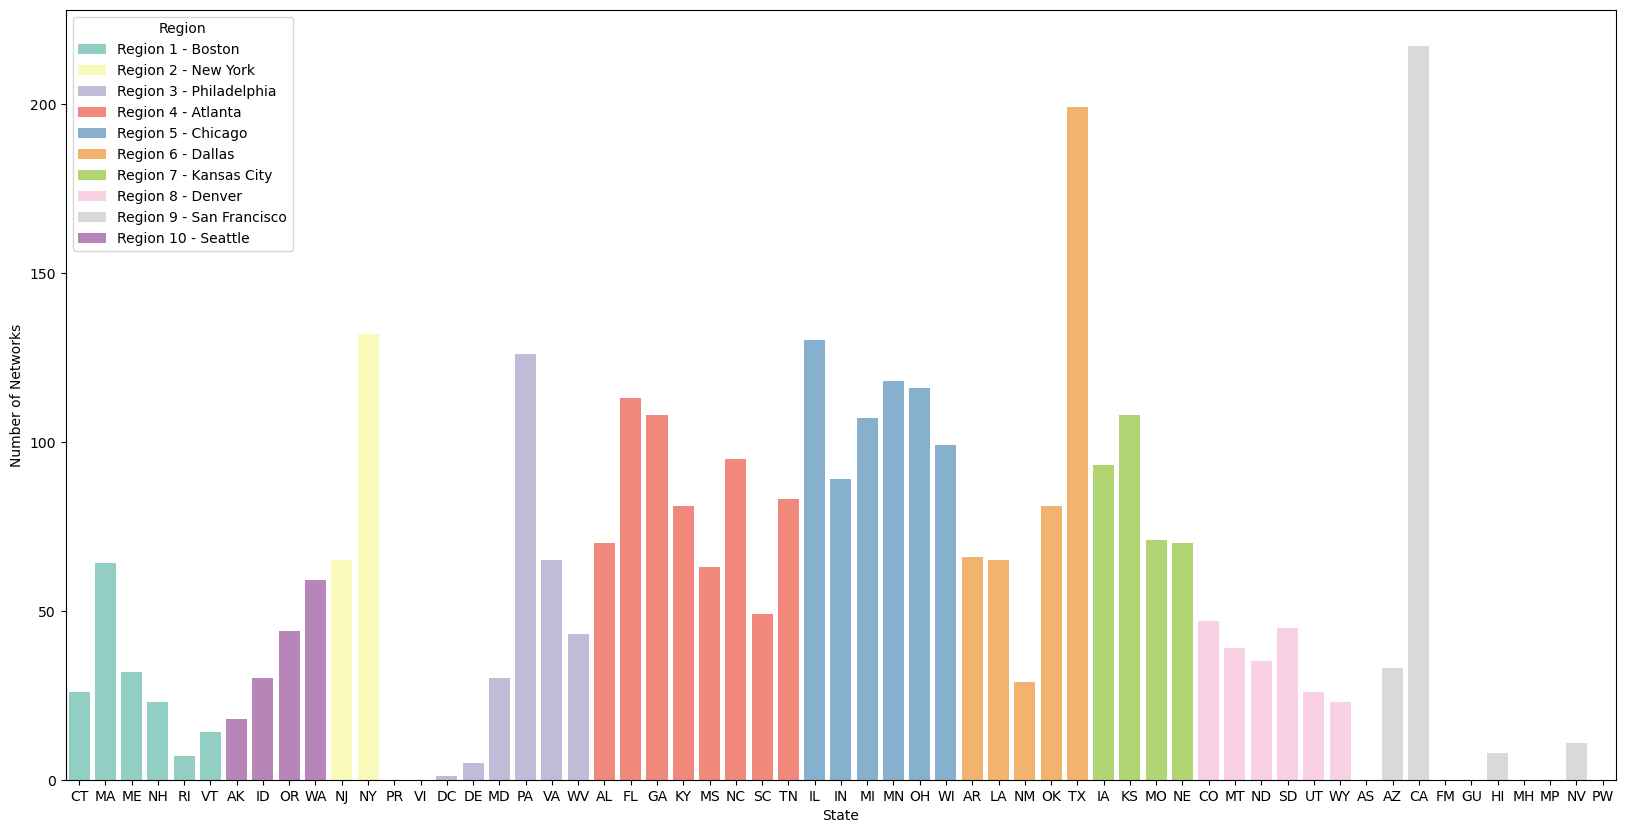

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x="State", hue="Region",hue_order=sorted_regions_array,order=ordered_states,palette="Set3",saturation=0.85,)
plt.ylabel('Number of Networks')
plt.show()

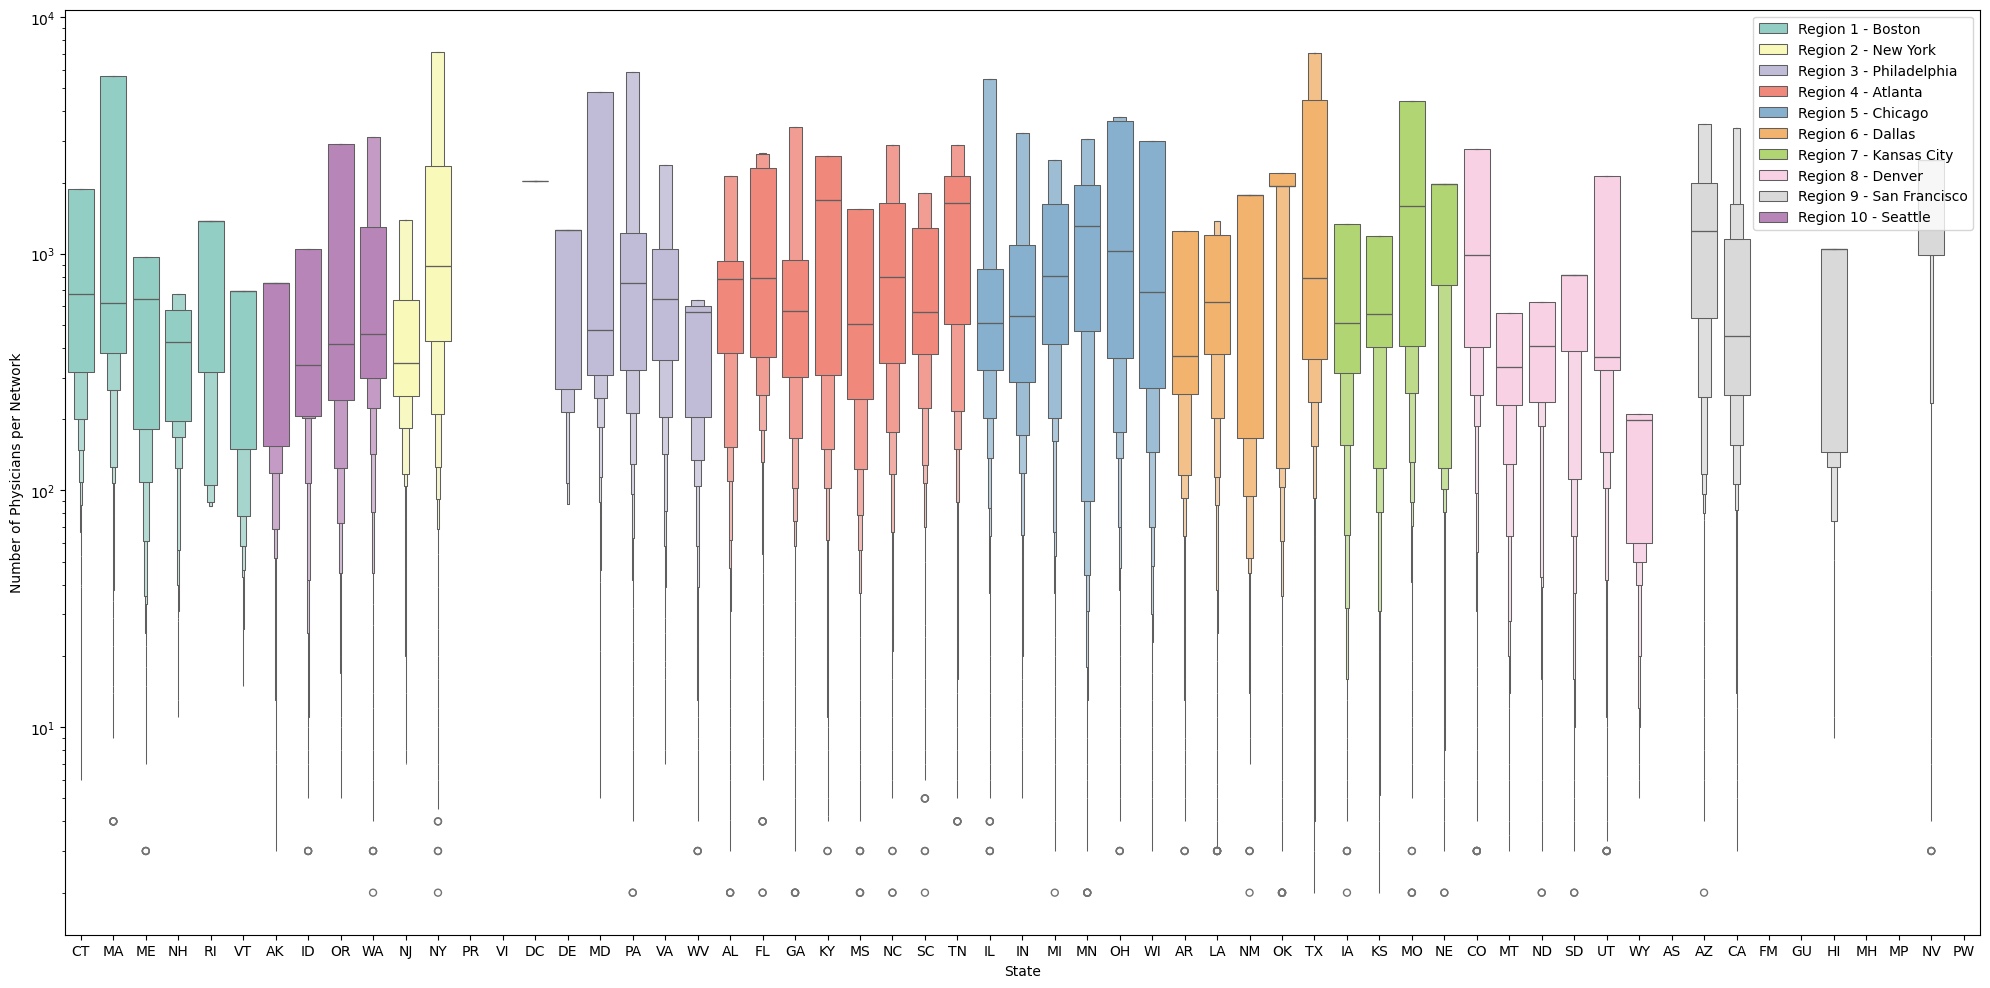

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxenplot(data=df, x="State",y="Num Nodes", hue="Region",hue_order=sorted_regions_array,order=ordered_states,palette="Set3",saturation=0.85,log_scale=True)
plt.ylabel('Number of Physicians per Network')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

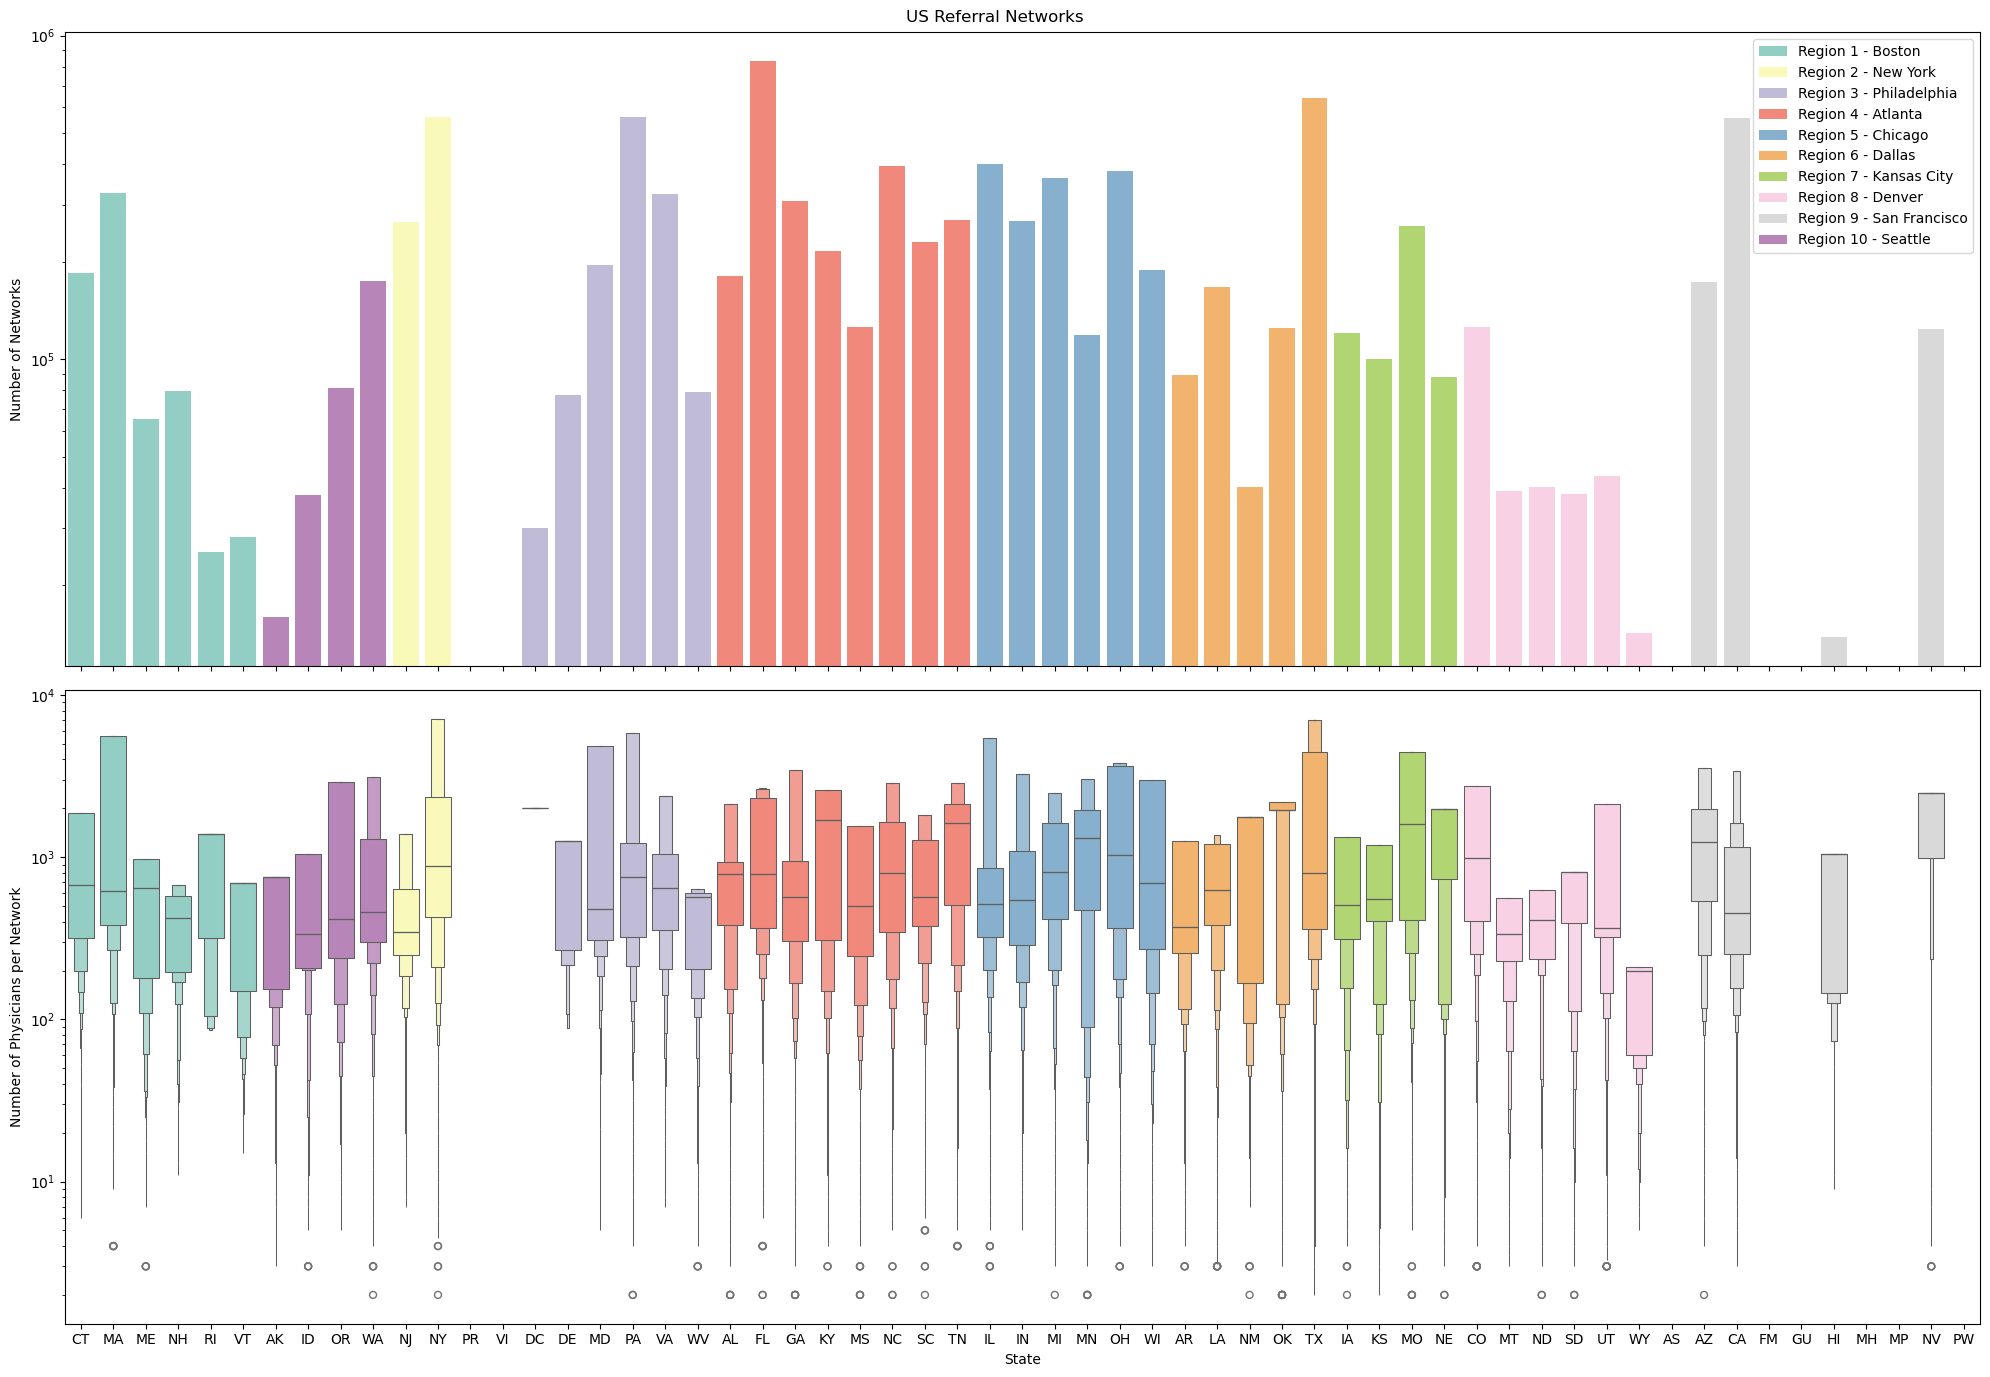

In [ ]:
# Set up the figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 14), sharex=True)

# Plot 1: Countplot
sns.countplot(data=df, x="State", hue="Region", hue_order=sorted_regions_array, order=ordered_states, palette="Set3", saturation=0.85, ax=ax1,)
ax1.set_ylabel('Number of Networks')
ax1.set_yscale('log')
ax1.legend(loc='upper right')  # 

# Plot 2: Boxenplot
sns.boxenplot(data=df, x="State", y="Num Nodes", hue="Region", hue_order=sorted_regions_array, order=ordered_states, palette="Set3", saturation=0.85, log_scale=True, ax=ax2)
ax2.set_ylabel('Number of Physicians per Network')
ax2.legend(loc='upper right')
ax2.get_legend().remove()

plt.suptitle("US Referral Networks")
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Explode the arrays into separate rows

west_coast = df[(df["Region"] == "Region 9 - San Francisco") | (df["Region"] == "Region 10 - Seattle")]
west_coast = west_coast.explode('Forman Curvature')

# Melt the dataframe
west_coast_melted_df = pd.melt(west_coast, id_vars=['State', 'Region', 'Medicare', 'Total Mortality', 'Non-HMO Mortality', 'Num Nodes', 'Num Edges'],
                    var_name='Curvature_Type', value_name='Curvature_Value')

In [ ]:
west_coast_melted_df.head()

,State,Region,Medicare,Total Mortality,Non-HMO Mortality,Num Nodes,Num Edges,Curvature_Type,Curvature_Value
0,CA,Region 9 - San Francisco,10506,3.76,3.79,55,340,Forman Curvature,-21.0
1,CA,Region 9 - San Francisco,10506,3.76,3.79,55,340,Forman Curvature,-45.0
2,CA,Region 9 - San Francisco,10506,3.76,3.79,55,340,Forman Curvature,-48.0
3,CA,Region 9 - San Francisco,10506,3.76,3.79,55,340,Forman Curvature,-43.0
4,CA,Region 9 - San Francisco,10506,3.76,3.79,55,340,Forman Curvature,-15.0


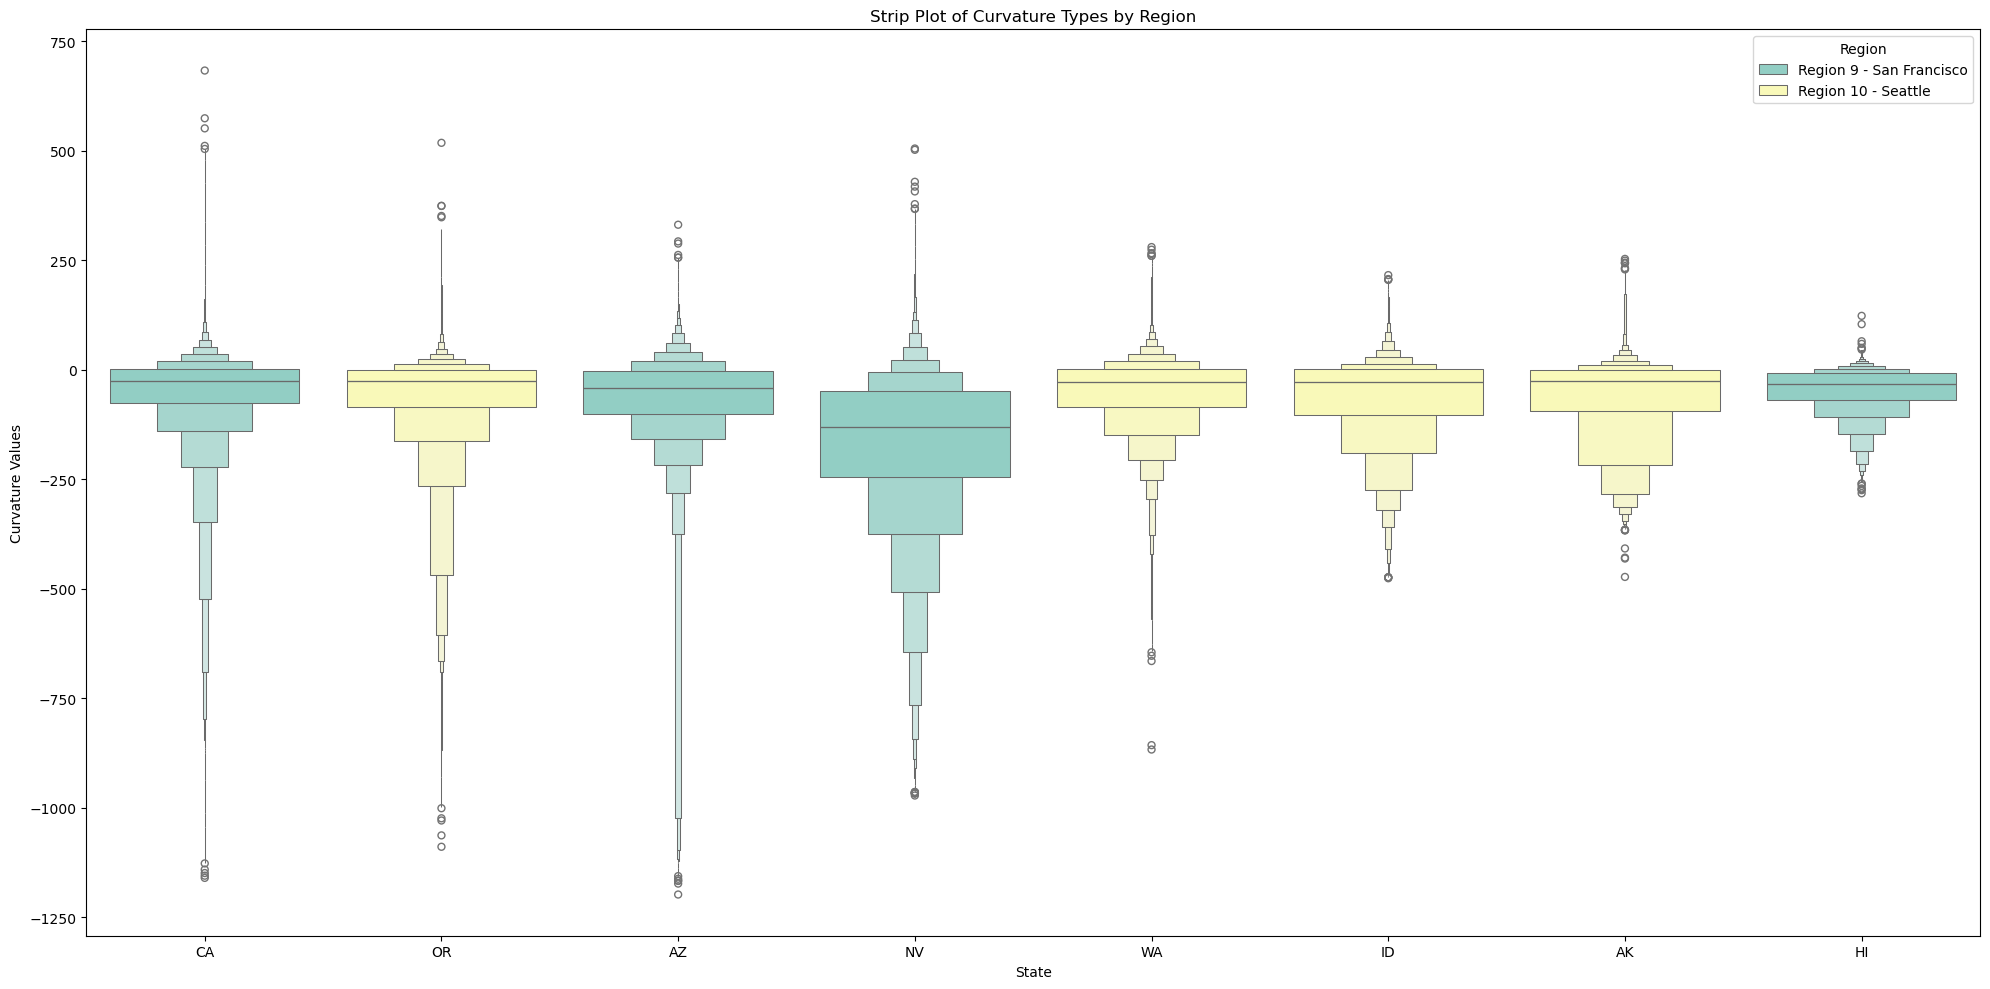

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxenplot(x='State', y='Curvature_Value', hue="Region", data=west_coast_melted_df, palette="Set3", saturation=0.85)
plt.title('Strip Plot of Curvature Types by Region')
plt.xlabel('State')
plt.ylabel('Curvature Values')
plt.tight_layout()
plt.show()

In [ ]:
df = df.explode('Forman Curvature')

# Melt the dataframe
melted_df = pd.melt(df, id_vars=['State', 'Region', 'Medicare', 'Total Mortality', 'Non-HMO Mortality', 'Num Nodes', 'Num Edges'],
                    var_name='Curvature_Type', value_name='Curvature_Value')

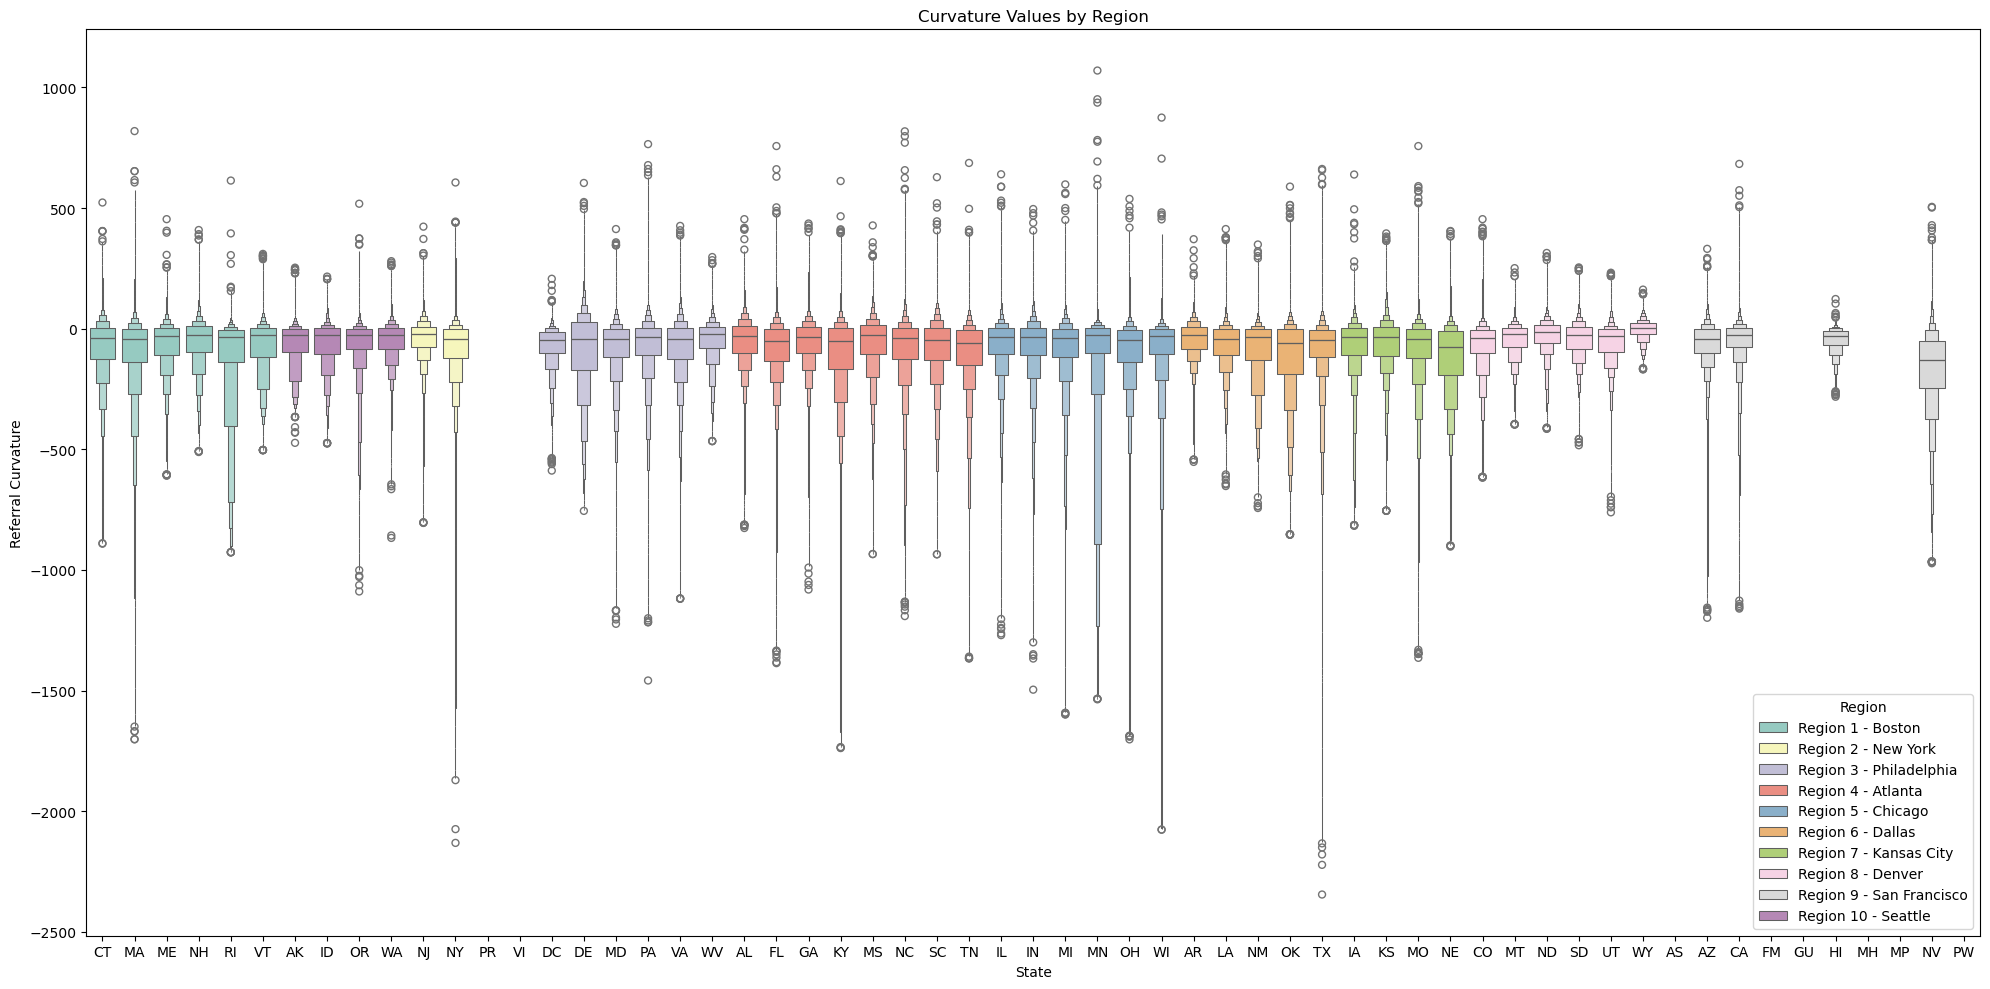

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxenplot(x='State', y='Curvature_Value', hue="Region", data=melted_df, palette="Set3",hue_order=sorted_regions_array,order=ordered_states,)
plt.title('Curvature Values by Region')
plt.xlabel('State')
plt.ylabel('Referral Curvature')
plt.tight_layout()
plt.show()

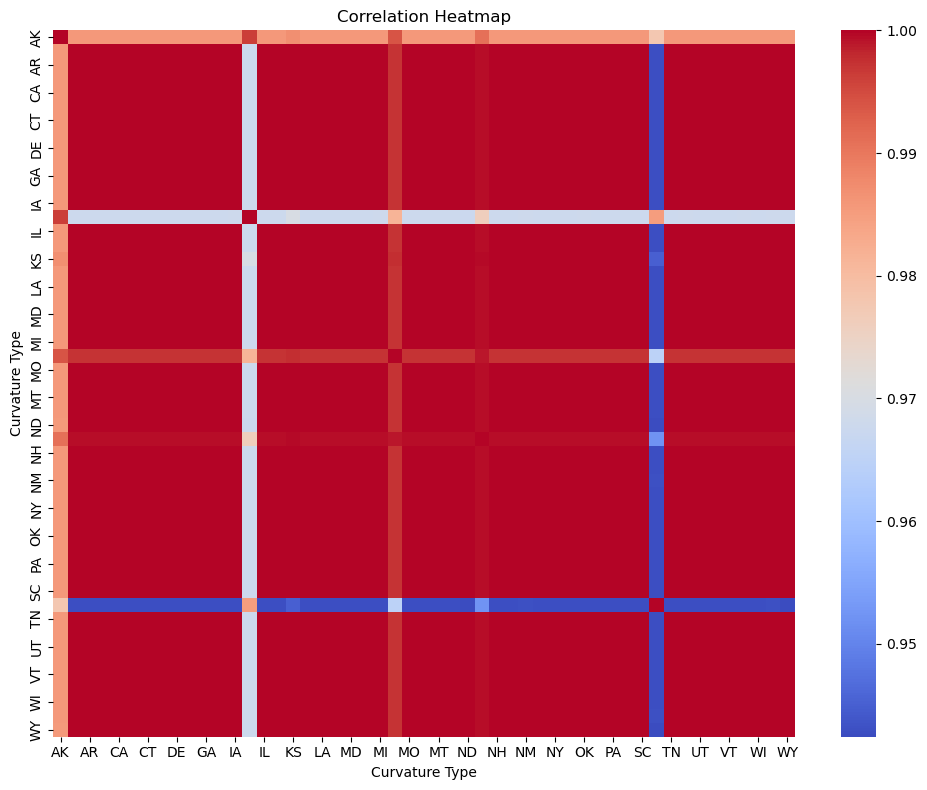

In [ ]:
pivoted_df = melted_df.pivot_table(index=None, columns='State', values=['Curvature_Value', 'Medicare', "Total Mortality", "Non-HMO Mortality"])



# Aggregate Curvature (e.g. take average over state)
# Calculate the correlation matrix
correlation_matrix = pivoted_df.corr()


# Plot pairwise correlation: Curvature vs. Mortality (as triangle)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xlabel('Curvature Type')
plt.ylabel('Curvature Type')
plt.tight_layout()
plt.show()

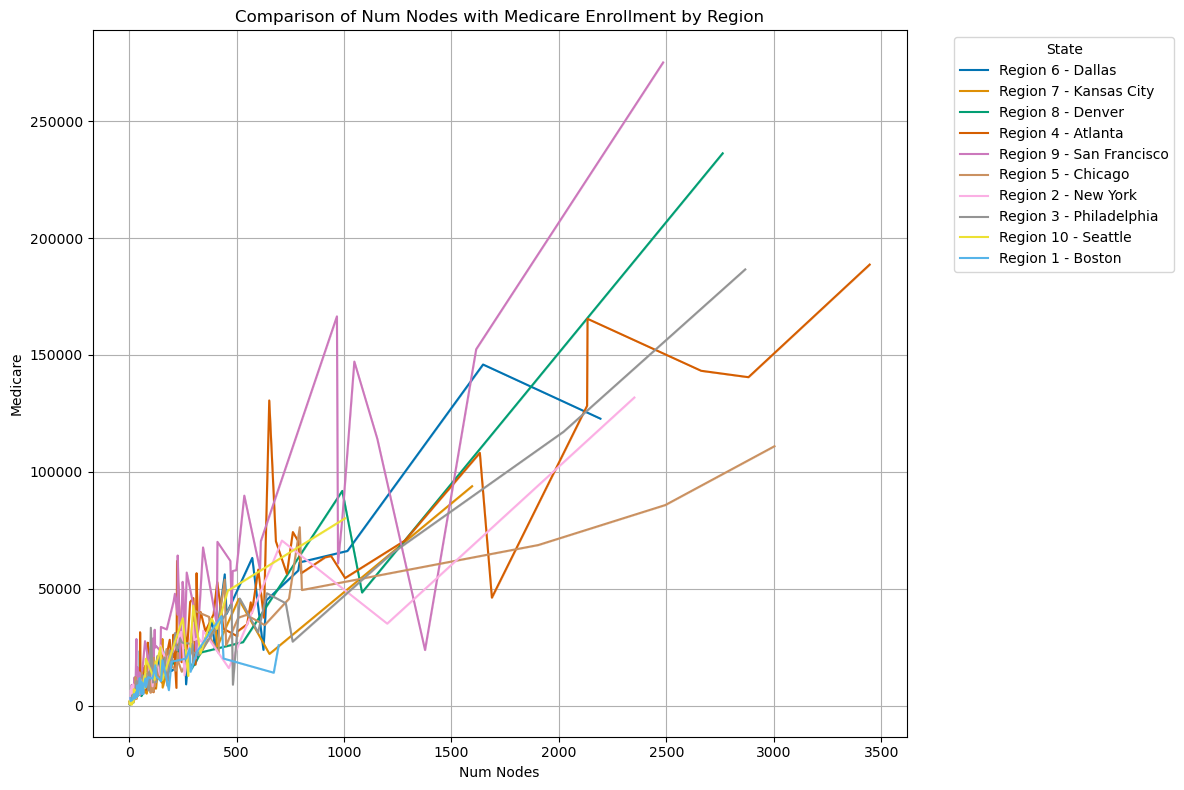

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.lineplot(data=df, x='Num Nodes', y='Medicare', hue='Region', palette='colorblind',)
plt.xlabel('Num Nodes')
plt.ylabel('Medicare')
plt.title('Comparison of Num Nodes with Medicare Enrollment by Region')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.relplot(data=df, x='Num Nodes', y='Medicare',size="Total Mortality", hue='Region', palette='colorblind')
plt.xlabel('Num Nodes')
plt.ylabel('Medicare')
plt.title('Comparison of Num Nodes with Medicare Enrollment by State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

: 

# Additional Meta Data
* Census Data
* HEDIS
* PostDis

In [ ]:
hedis = pd.read_csv("../data/physician_network_curvature_hsa_hedis_6575ffs_wide.csv.gz", compression='gzip')
hedis = hedis[hedis["year"]==2017].drop(columns=["year"])
hedis.rename(columns={"hsa": "hsanum"}, inplace=True)
hedis.head()

,hsanum,obd_overall_diab_bloodlip,obd_nonblk_diab_bloodlip,obd_blk_diab_bloodlip,obd_blk_diab_eye,obd_overall_diab_eye,obd_nonblk_diab_eye,obd_overall_diab_hgb,obd_blk_diab_hgb,obd_nonblk_diab_hgb,...,ptl_nonblk_diab_eye,ptl_overall_diab_hgb,ptl_blk_diab_hgb,ptl_nonblk_diab_hgb,ptl_overall_mam_mam6769,ptl_nonblk_mam_mam6769,ptl_blk_mam_mam6769,ptl_nonblk_ptbjune_amcare2,ptl_blk_ptbjune_amcare2,ptl_overall_ptbjune_amcare2
9,1001,NaN,NaN,NaN,57.0,631.0,574.0,880.0,90.0,790.0,...,0.389,0.683,0.882,0.633,0.398,0.354,0.819,0.535,0.648,0.544
21,1002,NaN,NaN,NaN,74.0,253.0,179.0,348.0,101.0,247.0,...,0.241,0.222,0.366,0.222,0.125,0.094,0.236,0.733,0.857,0.709
33,1003,NaN,NaN,NaN,44.0,371.0,327.0,498.0,68.0,430.0,...,0.343,0.174,0.238,0.179,0.409,0.380,0.619,0.910,0.923,0.905
45,1004,NaN,NaN,NaN,233.0,1157.0,924.0,1560.0,289.0,1271.0,...,0.174,0.108,0.120,0.122,0.206,0.222,0.115,0.616,0.740,0.600
57,1006,NaN,NaN,NaN,24.0,133.0,109.0,206.0,30.0,176.0,...,0.053,0.399,0.356,0.424,0.363,0.305,0.823,0.744,0.692,0.713


In [ ]:
postdis = pd.read_csv("../data/physician_network_curvature_hsa_postdis_6599ffs_wide.csv.gz", compression='gzip')
postdis = postdis[postdis["year"]==2017].drop(columns=["year"])
postdis.rename(columns={"hsa": "hsanum"}, inplace=True)
postdis.head()

,hsanum,obd_pt_asr_ami_anyac,obd_pt_asr_ami_aoervis,obd_pt_asr_ami_mdac,obd_pt_asr_ami_readmit,obd_pt_asr_chf_anyac,obd_pt_asr_chf_aoervis,obd_pt_asr_chf_mdac,obd_pt_asr_chf_readmit,obd_pt_asr_med_anyac,...,ptl_pt_asr_med_aoervis,ptl_pt_asr_med_mdac,ptl_pt_asr_med_readmit,ptl_pt_asr_pn_anyac,ptl_pt_asr_pn_aoervis,ptl_pt_asr_pn_mdac,ptl_pt_asr_pn_readmit,ptl_pt_asr_sur_aoervis,ptl_pt_asr_sur_mdac,ptl_pt_asr_sur_readmit
8,1001,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,315.0,...,0.508,0.194,0.798,NaN,NaN,NaN,NaN,0.614,0.121,0.923
19,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,...,0.793,0.565,0.539,NaN,NaN,NaN,NaN,0.454,0.142,NaN
30,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.0,...,0.300,0.848,0.224,0.989,NaN,NaN,NaN,0.428,0.641,0.851
41,1004,49.0,NaN,26.0,NaN,55.0,41.0,35.0,30.0,743.0,...,0.145,0.341,0.261,0.306,NaN,0.596,NaN,0.808,0.309,0.962
52,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,...,0.011,0.009,0.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
std_prices = pd.read_csv("../data/physician_network_curvature_hsa_stdprices_ffs_wide.csv.gz",compression='gzip')
std_prices = std_prices[std_prices["year"]==2017].drop(columns=["year"])
std_prices.rename(columns={"hsa": "hsanum"}, inplace=True)
std_prices.head()

,hsanum,ar_pmt_dme,ar_pmt_hha,ar_pmt_hospice,ar_pmt_hospitalsnf,ar_pmt_outpt,ar_pmt_physician,ar_pmt_total,ar_stdprice_dme,ar_stdprice_hha,...,ptl_pmt_outpt,ptl_pmt_physician,ptl_pmt_total,ptl_stdprice_dme,ptl_stdprice_hha,ptl_stdprice_hospice,ptl_stdprice_hospitalsnf,ptl_stdprice_outpt,ptl_stdprice_physician,ptl_stdprice_total
6,1001,214.62,690.54,639.84,4173.35,1475.76,3482.00,10659.04,209.84,768.30,...,7.9,89.7,66.9,80.6,83.5,93.9,74.3,16.9,93.9,86.2
15,1002,237.64,531.34,625.08,3087.10,2428.06,2626.55,9512.50,235.70,639.67,...,71.3,63.6,36.5,90.3,73.1,94.2,24.8,81.5,72.5,73.0
24,1003,240.42,815.67,512.81,3795.63,1792.41,2927.63,10079.22,240.83,988.71,...,28.2,76.3,53.0,91.6,92.7,85.1,73.2,46.9,80.8,86.6
33,1004,179.67,671.97,713.74,4205.48,1467.42,3068.67,10276.49,180.73,777.60,...,7.5,80.3,57.9,57.9,84.4,96.8,86.0,22.3,85.0,89.0
42,1006,172.55,611.95,630.24,3079.54,1608.90,2182.90,8261.74,168.99,741.02,...,15.7,37.5,6.0,46.8,81.9,95.3,22.2,34.3,39.0,32.7


In [ ]:
# Read in and join Census Data
census = pd.read_csv("../data/census_data.csv.gz", compression='gzip')
census = census[census["year"]==2017].drop(columns=["year"])
census.head()


,hsanum,race_total_pop,race_black_pop,hispanic_total_pop,hispanic_pop,median_hh_income,employment_pop,employment_unemployed_pop,education_pop,education_nohs_pop
3,1001,113846,15725,113846,8875,665537.0,53481,2985,75356,11063
7,1002,22751,7725,22751,821,64984.0,9258,971,15983,3763
11,1003,25672,3500,25672,439,242027.0,11588,1229,17934,2899
15,1004,100479,21195,100479,4013,563869.0,45552,4680,69899,12723
19,1006,11491,1671,11491,419,109751.0,5077,374,7985,2086


In [ ]:
joins = [hedis, postdis, std_prices, census]
suffixes = ["h", "p", None,None]

for i,join in enumerate(joins):
    df = pd.merge(df, join, on='hsanum',suffixes=(None,suffixes[i]))

In [ ]:
for col in df.columns:
    print(col)

hsanum
region
state
medicare_enrollment
total_mortality
non_hmo_mortality
forman_curvature
n_nodes
n_edges
density
assortativity
average_degrees
clustering_coefficients
node_connectivities
degree_correlations
obd_overall_diab_bloodlip
obd_nonblk_diab_bloodlip
obd_blk_diab_bloodlip
obd_blk_diab_eye
obd_overall_diab_eye
obd_nonblk_diab_eye
obd_overall_diab_hgb
obd_blk_diab_hgb
obd_nonblk_diab_hgb
obd_overall_mam_mam6769
obd_nonblk_mam_mam6769
obd_blk_mam_mam6769
obd_nonblk_ptbjune_amcare2
obd_blk_ptbjune_amcare2
obd_overall_ptbjune_amcare2
oe_overall_diab_bloodlip
oe_nonblk_diab_bloodlip
oe_blk_diab_bloodlip
oe_blk_diab_eye
oe_overall_diab_eye
oe_nonblk_diab_eye
oe_overall_diab_hgb
oe_blk_diab_hgb
oe_nonblk_diab_hgb
oe_overall_mam_mam6769
oe_nonblk_mam_mam6769
oe_blk_mam_mam6769
oe_nonblk_ptbjune_amcare2
oe_blk_ptbjune_amcare2
oe_overall_ptbjune_amcare2
cr_overall_diab_bloodlip
cr_nonblk_diab_bloodlip
cr_blk_diab_bloodlip
cr_blk_diab_eye
cr_overall_diab_eye
cr_nonblk_diab_eye
cr_overall_

In [ ]:
df.to_pickle("../outputs/joined_features.pkl")

In [ ]:
df.shape

(3371, 293)

In [ ]:
experiment = df.copy()

In [ ]:
def calc_quantiles(lst):
    upper_q = np.percentile(lst, 75)
    lower_q = np.percentile(lst, 25)
    return pd.Series([np.mean(lst), np.std(lst), upper_q, lower_q], index=['forman_average', "forman_std", 'forman_upper_quantile', 'forman_lower_quantile'])

In [ ]:
forman_stats = df["forman_curvature"].apply(calc_quantiles)


In [ ]:
new_df = pd.concat([df, forman_stats], axis=1)

In [ ]:
new_df["forman_lower_quantile"].describe()

count    3371.000000
mean      -21.643207
std        47.218764
min      -927.000000
25%       -22.000000
50%        -4.000000
75%         1.000000
max        17.500000
Name: forman_lower_quantile, dtype: float64

In [ ]:
new_df["forman_average"].describe()

count    3371.000000
mean       -9.364174
std        30.904147
min      -501.218281
25%        -7.207327
50%         0.734375
75%         3.600477
max        29.088420
Name: forman_average, dtype: float64

In [ ]:
for col in new_df.columns:
    print(col)

hsa_name
hsanum
region
state
medicare_enrollment
total_mortality
non_hmo_mortality
forman_curvature
n_nodes
n_edges
density
assortativity
average_degrees
clustering_coefficients
node_connectivities
degree_correlations
forman_average
forman_std
forman_upper_quantile
forman_lower_quantile


In [ ]:
new_df.dropna(inplace=True,axis=1)

In [ ]:
new_df

,hsa_name,hsanum,region,state,medicare_enrollment,total_mortality,non_hmo_mortality,forman_curvature,n_nodes,n_edges,density,average_degrees,clustering_coefficients,node_connectivities,forman_average,forman_std,forman_upper_quantile,forman_lower_quantile
0,AR- ASHDOWN,4002,Region 6 - Dallas,AR,1793,5.60,5.64,"[-2.0, 0.0, -2.0, -3.0, 0.0, 3.0, 1.0]",7,7,0.333333,2.000000,0.300000,1,-0.428571,1.916630,0.5,-2.00
1,KS- GREAT BEND,17037,Region 7 - Kansas City,KS,4878,4.63,4.62,"[10.0, 6.0, 8.0, 4.0, 0.0, 12.0, 7.0, 12.0, 9....",47,314,0.290472,13.361702,0.808016,0,-1.968153,12.181442,6.0,-11.00
2,CO- LA JUNTA,6035,Region 8 - Denver,CO,4552,4.79,4.78,"[-6.0, -1.0, -12.0, 15.0, 16.0, -9.0, -1.0, -4...",31,138,0.296774,8.903226,0.650125,0,-1.615942,8.522198,2.0,-7.75
3,AL- FOLEY,1037,Region 4 - Atlanta,AL,15290,4.30,4.24,"[-21.0, 4.0, -18.0, -10.0, -11.0, -11.0, -19.0...",76,588,0.206316,15.473684,0.579171,0,-5.988095,14.620419,4.0,-15.25
4,CA- MADERA,5131,Region 9 - San Francisco,CA,10506,3.76,3.79,"[-21.0, -45.0, -48.0, -43.0, -15.0, -25.0, 8.0...",55,340,0.228956,12.363636,0.735104,1,-7.988235,15.999260,4.0,-18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,KS- ATCHISON,17005,Region 7 - Kansas City,KS,2854,4.22,4.44,"[0.0, 21.0, 18.0, 24.0, -4.0, 16.0, 20.0, -1.0...",29,242,0.596059,16.689655,0.776591,1,7.520661,8.857550,14.0,0.00
3367,IN- NEW CASTLE,15060,Region 5 - Chicago,IN,6230,5.99,6.33,"[-25.0, -27.0, -36.0, -14.0, -20.0, -25.0, 13....",55,485,0.326599,17.636364,0.749544,1,0.816495,13.648962,10.0,-6.00
3368,NY- BROOKLYN,33014,Region 2 - New York,NY,294977,3.42,3.63,"[3.0, 4.0, 3.0, 4.0, -63.0, -48.0, -1.0, 4.0, ...",3015,48729,0.010725,32.324378,0.559088,0,-133.218658,158.539321,-24.0,-202.00
3369,NM- ALAMOGORDO,32001,Region 6 - Dallas,NM,9448,4.32,4.32,"[45.0, 47.0, -42.0, -19.0, 51.0, 8.0, 14.0, -1...",71,915,0.368209,25.774648,0.766140,1,0.969399,20.465328,11.0,-12.00


In [ ]:
state_groups = new_df.groupby("state")

In [ ]:
# Determine the lower quantile (e.g., 25th percentile)
col = "forman_average"
lower_quantile = new_df[col].quantile(0.05)

# Filter rows based on the lower quantile
lower_quantile_rows = new_df[new_df[col] <= lower_quantile]
lower_quantile_rows

,hsanum,region,state,medicare_enrollment,total_mortality,non_hmo_mortality,forman_curvature,n_nodes,n_edges,density,...,hispanic_pop,median_hh_income,employment_pop,employment_unemployed_pop,education_pop,education_nohs_pop,forman_average,forman_std,forman_upper_quantile,forman_lower_quantile
12,18045,Region 4 - Atlanta,KY,46195,4.35,4.56,"[-561.0, -56.0, -768.0, -856.0, -417.0, -505.0...",1688,33326,0.023406,...,23747,936965.0,198649,12355,237608,24059,-140.140821,183.702954,-24.0,-184.0
28,26041,Region 7 - Kansas City,MO,93871,4.14,4.34,"[-7.0, -10.0, -9.0, -12.0, -6.0, -10.0, -5.0, ...",1596,36560,0.028724,...,51133,3628876.0,345376,18394,443183,38180,-73.855935,98.730147,-6.0,-122.0
42,36055,Region 5 - Chicago,OH,45728,4.00,4.21,"[3.0, 4.0, 4.0, 3.0, 3.0, -22.0, 4.0, -135.0, ...",744,16522,0.059777,...,5213,965354.0,126258,5813,171106,9341,-82.753541,104.679013,-13.0,-127.0
62,45168,Region 6 - Dallas,TX,61280,4.79,4.93,"[-186.0, -210.0, -126.0, -233.0, -156.0, -105....",793,18663,0.059431,...,202385,4835693.0,234381,12493,289418,57228,-86.113540,92.861855,-18.0,-137.0
79,39041,Region 3 - Philadelphia,PA,43804,4.50,4.73,"[7.0, -82.0, -242.0, -303.0, -387.0, -271.0, -...",729,18654,0.070298,...,11094,1330119.0,129607,8538,179157,16198,-83.801758,126.148465,1.0,-130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,10040,Region 4 - Atlanta,FL,70258,4.49,4.60,"[-770.0, -714.0, -715.0, -740.0, -636.0, -716....",1286,34412,0.041648,...,36546,1881541.0,203401,15056,294926,37764,-134.833808,184.670976,-17.0,-199.0
3325,22058,Region 1 - Boston,MA,49346,4.26,4.58,"[-4.0, -2.0, -25.0, -18.0, 6.0, 15.0, 5.0, -2....",1144,40154,0.061417,...,85263,1105264.0,155444,12974,209987,32870,-146.363426,183.325412,-16.0,-229.0
3333,45229,Region 6 - Dallas,TX,272495,4.08,4.08,"[-38.0, -5.0, -22.0, -62.0, -17.0, -152.0, -40...",3144,46661,0.009444,...,1253875,6701402.0,1082748,64195,1402016,222395,-100.173335,96.436775,-37.0,-136.0
3352,44009,Region 4 - Atlanta,TN,75762,4.71,4.87,"[-279.0, -33.0, -49.0, -69.0, -100.0, -219.0, ...",1168,36414,0.053430,...,21318,1910807.0,227486,13237,318042,39882,-156.909705,187.870749,-38.0,-220.0


In [ ]:
percentile_10 = new_df.groupby("region")[col].quantile(0.01)

In [ ]:
below_10th_percentile_rows = []

# Iterate over groups (states) and filter rows below the 10th percentile
for state, percentile_value in percentile_10.items():
    below_10th_percentile_rows.extend(new_df[(new_df['region'] == state) & (new_df[col] < percentile_value)].index.tolist())


In [ ]:
low_curvature = new_df.loc[below_10th_percentile_rows]

In [ ]:

low_curvature

,hsanum,region,state,medicare_enrollment,total_mortality,non_hmo_mortality,forman_curvature,n_nodes,n_edges,density,...,hispanic_pop,median_hh_income,employment_pop,employment_unemployed_pop,education_pop,education_nohs_pop,forman_average,forman_std,forman_upper_quantile,forman_lower_quantile
1818,22070,Region 1 - Boston,MA,69739,4.19,4.33,"[-161.0, -153.0, 82.0, -206.0, -52.0, 68.0, -1...",1641,33291,0.024740,...,50452,3832780.0,261428,14917,330420,30571,-199.581599,225.378157,-36.0,-299.00
2108,41005,Region 1 - Boston,RI,77333,3.97,3.80,"[-780.0, -785.0, -791.0, -773.0, -782.0, -510....",1380,16390,0.017225,...,98854,2052175.0,268490,18553,344243,49286,-205.998475,274.611184,-20.0,-310.75
1239,38043,Region 10 - Seattle,OR,203682,3.92,4.16,"[-72.0, -69.0, -102.0, -100.0, -61.0, -49.0, -...",2911,25352,0.005986,...,163472,4148844.0,812498,50941,1040212,83656,-133.984617,193.614399,-7.0,-171.00
2310,13004,Region 10 - Seattle,ID,70182,4.07,4.36,"[-247.0, -240.0, -322.0, -320.0, -288.0, -265....",1047,14195,0.025923,...,35913,1562280.0,237977,10496,311878,17604,-128.582670,125.877687,-15.0,-228.00
1251,33080,Region 2 - New York,NY,286640,3.08,3.05,"[18.0, 6.0, 8.0, -12.0, -1.0, -3.0, -20.0, -3....",7139,72183,0.002833,...,546574,5164130.0,1175712,72200,1532608,210499,-175.188258,289.981458,-16.0,-204.00
1580,33001,Region 2 - New York,NY,51862,4.26,4.47,"[-57.0, -106.0, -50.0, -481.0, -82.0, -63.0, -...",1170,23543,0.034426,...,18279,3492237.0,171813,8770,214787,16621,-156.664062,175.235569,-29.0,-219.00
2880,49048,Region 3 - Philadelphia,VA,171433,4.18,4.13,"[-18.0, -325.0, -117.0, -35.0, -138.0, -296.0,...",2366,73821,0.026385,...,66558,5416441.0,620468,36372,790982,84136,-161.913114,190.224094,-35.0,-231.00
2886,21002,Region 3 - Philadelphia,MD,197354,4.40,4.27,"[-177.0, -158.0, -4.0, -140.0, -183.0, -103.0,...",4829,83815,0.007190,...,71048,4527616.0,714112,52276,950077,116509,-144.854453,171.738744,-22.0,-220.00
2965,39063,Region 3 - Philadelphia,PA,80014,3.93,3.92,"[-835.0, -745.0, -773.0, -741.0, -803.0, -827....",959,32056,0.069784,...,50764,2516545.0,244872,11681,312474,46382,-142.291521,192.330935,-12.0,-227.00
157,10050,Region 4 - Atlanta,FL,143240,4.36,4.54,"[-435.0, -367.0, -245.0, -409.0, -552.0, -96.0...",2662,96815,0.027335,...,86031,2299145.0,531251,37685,697287,72988,-184.222610,218.913370,-37.0,-261.00


In [ ]:
low_curvature[low_curvature["region"]=="Region 9 - San Francisco"]

,hsanum,region,state,medicare_enrollment,total_mortality,non_hmo_mortality,forman_curvature,n_nodes,n_edges,density,...,hispanic_pop,median_hh_income,employment_pop,employment_unemployed_pop,education_pop,education_nohs_pop,forman_average,forman_std,forman_upper_quantile,forman_lower_quantile
125,5078,Region 9 - San Francisco,CA,114118,3.90,4.03,"[-48.0, -20.0, -52.0, 45.0, -102.0, -105.0, 46...",1155,34675,0.052031,...,456023,2928091.0,415412,43099,560771,134004,-138.749358,146.783933,-35.0,-212.0
135,5200,Region 9 - San Francisco,CA,152458,3.81,3.88,"[-7.0, -598.0, 2.0, -474.0, -526.0, -21.0, -57...",1615,24129,0.018514,...,281309,3219527.0,566241,51431,762264,107068,-120.524017,157.605361,-17.0,-156.0
175,5248,Region 9 - San Francisco,CA,70376,3.12,3.15,"[-18.0, -20.0, -177.0, -11.0, -149.0, -6.0, -4...",613,8898,0.047436,...,97776,1267366.0,229481,12734,312531,25657,-63.297707,71.315440,-12.0,-102.0
199,5210,Region 9 - San Francisco,CA,166514,3.14,3.16,"[-25.0, 12.0, -16.0, 18.0, 30.0, 5.0, -76.0, -...",967,10248,0.021941,...,389906,4156770.0,741285,44218,941647,134649,-47.041569,43.892849,-13.0,-75.0
354,5149,Region 9 - San Francisco,CA,42275,2.88,2.72,"[-43.0, -49.0, 15.0, -18.0, 29.0, -44.0, -22.0...",477,6907,0.060841,...,45233,1485053.0,184177,8923,243039,14683,-78.447227,106.783860,-12.0,-107.0
440,5262,Region 9 - San Francisco,CA,57984,3.13,3.15,"[-251.0, -224.0, -253.0, -191.0, -259.0, -241....",499,11271,0.090712,...,23248,1722227.0,137404,6827,198335,4463,-54.422234,90.215015,13.0,-111.0
511,3029,Region 9 - San Francisco,AZ,89829,3.50,3.52,"[4.0, -177.0, 57.0, -65.0, -151.0, -66.0, 23.0...",536,18117,0.126357,...,42323,583818.0,103294,7370,210379,17832,-44.785340,74.023999,2.0,-89.0
551,12003,Region 9 - San Francisco,HI,147187,3.29,3.17,"[-28.0, -39.0, -95.0, -20.0, -108.0, -57.0, -1...",1048,9980,0.018191,...,79686,2231274.0,470503,19672,616741,54603,-58.817335,56.126717,-17.0,-87.0
656,5237,Region 9 - San Francisco,CA,23793,2.87,2.84,"[7.0, -15.0, 13.0, 15.0, 10.0, 17.0, 13.0, -20...",1377,14452,0.015255,...,33289,1169728.0,85037,4106,108940,9315,-180.778854,258.429487,-14.0,-213.0
679,5219,Region 9 - San Francisco,CA,34707,3.14,3.05,"[-194.0, -57.0, -121.0, -68.0, -157.0, -64.0, ...",408,9270,0.111649,...,67590,847338.0,117224,7257,131926,15574,-49.777023,53.444108,-13.0,-80.0


In [ ]:
randomly_selected_rows = low_curvature.sample(n=1, replace=False)["hsanum"].values

In [14]:
for G in graphs.values():
    if G["HSA Name"] == 'CA- SANTA ANA':
        print("hsanum",G["hsanum"])
        graph = G["graph"]
        curvature = G["OR_0"]


graph

hsanum 5218


In [15]:
with open("../outputs/santa_ana_graph.pkl","wb") as f:
    pickle.dump(graph,f)

In [12]:

pos = nx.circular_layout(graph)


degrees = graph.degree() #Dict with Node ID, Degree
centrality = nx.degree_centrality(graph)
cent_sizes = [centrality[node] * 1000 for node in graph.nodes()]



nodes = graph.nodes()
n_color = np.asarray([degrees[n] for n in nodes])


# Max
weights = [max(graph[u][v]['a2b'],graph[u][v]['b2a'])/16 for u,v in graph.edges()]



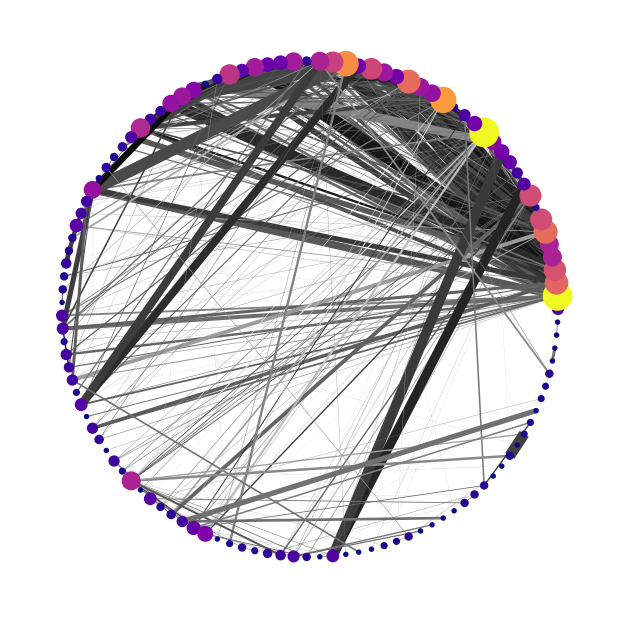

In [13]:
plt.figure(figsize=(6, 6))
nx.draw(graph, pos, node_size=cent_sizes, with_labels=False,node_color=n_color, cmap=plt.cm.plasma,width=weights,edge_color=curvature,edge_cmap=plt.cm.Greys)


['AR- ASHDOWN',
 'KS- GREAT BEND',
 'CO- LA JUNTA',
 'AL- FOLEY',
 'CA- MADERA',
 'WI- BELOIT',
 'TX- GONZALES',
 'OH- CAMBRIDGE',
 'KY- MANCHESTER',
 'OH- STEUBENVILLE',
 'NJ- PASSAIC',
 'MI- ROCHESTER',
 'KY- LEXINGTON',
 'AL- EUFAULA',
 'NM- ZUNI',
 'KY- FRANKFORT',
 'MD- LANHAM',
 'AL- WEDOWEE',
 'TN- OAK RIDGE',
 'PA- HUNTINGDON',
 'NY- FAR ROCKAWAY',
 'OH- CONNEAUT',
 'TX- PAMPA',
 'KY- CAMPBELLSVILLE',
 'NY- GENEVA',
 'PA- BRADFORD',
 'IL- HOFFMAN ESTATES',
 'PA- SCRANTON',
 'MO- KANSAS CITY',
 'MI- TAYLOR',
 'UT- PANGUITCH',
 'OK- ENID',
 'TN- GREENEVILLE',
 'TX- PORT LAVACA',
 'MI- LAURIUM',
 'KY- HARTFORD',
 'IN- PERU',
 'TX- NOCONA',
 'MI- MARLETTE',
 'MN- AURORA',
 'TX- WESLACO',
 'PA- PECKVILLE',
 'OH- KETTERING',
 'IL- EUREKA',
 'MO- LEES SUMMIT',
 'AR- LAKE VILLAGE',
 'CA- AVALON',
 'TX- ODESSA',
 'CA- GLENDALE',
 'OR- ASHLAND',
 'PA- DOYLESTOWN',
 'WY- WHEATLAND',
 'NY- DOBBS FERRY',
 'IL- HARVEY',
 'OH- SALEM',
 'WI- BLOOMER',
 'CA- SANTA PAULA',
 'FL- HIALEAH',
 'LA- 

In [ ]:
new_df[new_df["hsa_name"]== "CA- Santa Ana"]

,hsa_name,hsanum,region,state,medicare_enrollment,total_mortality,non_hmo_mortality,forman_curvature,n_nodes,n_edges,density,average_degrees,clustering_coefficients,node_connectivities,forman_average,forman_std,forman_upper_quantile,forman_lower_quantile


In [ ]:
import pickle
file = "/Users/jeremy.wayland/Desktop/projects/apparent/outputs/networks_data.pkl"

with open(file, 'rb') as f:
    data = pickle.load(f)

In [ ]:
#Update Violin Plots to depict distributions of various graph curvatures
data.head()

,hsanum,year,nnodes,nedges,n_components,degree_correlation,connectivity,density,degree_assortativity,average_degree,a2b,b2a
0,1001,2014,98,1464,2,"{69: 38.82608695652174, 14: 64.14285714285714,...",0,0.308016,-0.429306,29.877551,"[0, 0, 3, 101, 17, 12, 13, 16, 18, 24, 18, 29,...","[2, 1, 3, 85, 17, 17, 9, 22, 26, 29, 28, 32, 2..."
1464,1002,2014,37,413,1,"{22: 28.40909090909091, 29: 25.724137931034484...",1,0.620120,-0.276127,22.324324,"[16, 31, 22, 12, 9, 1, 22, 23, 19, 34, 4, 29, ...","[12, 28, 26, 8, 6, 5, 2, 16, 19, 33, 3, 31, 45..."
1877,1003,2014,25,143,1,"{17: 14.0, 12: 16.055555555555557, 16: 14.3125...",1,0.476667,-0.350290,11.440000,"[18, 23, 163, 68, 2, 7, 7, 24, 4, 2, 12, 3, 96...","[19, 26, 158, 63, 4, 7, 6, 27, 4, 3, 8, 0, 101..."
2020,1004,2014,117,2421,1,"{92: 49.96739130434783, 63: 61.20634920634921,...",1,0.356764,-0.410506,41.384615,"[271, 229, 199, 19, 23, 0, 73, 31, 24, 127, 56...","[270, 185, 158, 8, 22, 3, 64, 28, 24, 125, 49,..."
4441,1006,2014,8,14,1,"{5: 4.1, 1: 5.5, 4: 5.0, 6: 3.5, 2: 5.5}",1,0.500000,-0.458333,3.500000,"[0, 5, 43, 1, 46, 5, 298, 55, 18, 87, 0, 199, ...","[1, 6, 24, 0, 38, 7, 284, 43, 13, 86, 1, 196, ..."


In [4]:
import pickle

In [5]:
with open("/Users/jeremy.wayland/Desktop/projects/apparent/outputs/all_features2.pkl","rb") as f:
    all_features = pickle.load(f)

In [8]:
all_features.columns[:20]

Index(['hsanum', 'region', 'state', 'medicare_enrollment', 'total_mortality',
       'non_hmo_mortality', 'forman_curvature', 'n_nodes', 'n_edges',
       'density', 'assortativity', 'average_degrees',
       'clustering_coefficients', 'node_connectivities', 'degree_correlations',
       'obd_overall_diab_bloodlip', 'obd_nonblk_diab_bloodlip',
       'obd_blk_diab_bloodlip', 'obd_blk_diab_eye', 'obd_overall_diab_eye'],
      dtype='object')

In [ ]:
santa_ana = all_features[all_features["HSA Name"]==29323582]